# Credit Card Fraud Detection Project

## Author: Akhil Damidi

## Project Introduction: Credit Card Fraud Detection

A recent trip to Washington D.C. sparked my interest in understanding credit card fraud detection. My family and I were exploring the city's historical landmarks using electric scooters and bikes from various providers. After just an hour of riding, all our vehicles abruptly stopped, and we discovered that our credit card transactions had been flagged as fraudulent. While this was a false positive, it was understandable: we were more than 2,700 miles from home, using a service we had never used before, and making multiple simultaneous transactions. This experience highlighted the complexities credit card companies face in distinguishing between legitimate and fraudulent activities.

This project was driven by my desire to answer the following questions: 
- What key data points do credit card companies rely on to determine whether a transaction is fraudulent?
- How can fraud detection models be improved to reduce false positive while maintaining security?
- What additional data or techniques could enhance the accuracy and speed of fraud detection?
- Should companies prioritize reducing false positives, or is there a better balance that can be struck between security and user experience?

**Through this project, I aim to explore these questions and contribute to the development of more accurate and user-friendly fraud detection systems.**

## About Dataset

This project uses the `Credit Card Transactions Fraud Detection Dataset` which is a simulated credit card transaction dataset containing legitimate and fraud tansactions from the **duration 1st Jan 2019 - 31st Dec 2020**. It covers credit cards of **1000 customers doing transactions with a pool of 800 merchants**.

Key Features:
- **Customer Information**: These features can be used to understand customer behavior and detect anomolies.
    - `cc_num`: Credit Card Number of Customer
    - `first`: First Name of Credit Card Holder
    - `last`: Last Name of Credit Card Holder
    - `gender`: Gender of Credit Card Holder
    - `street`: Street Address of Credit Card Holder
    - `city`: City of Credit Card Holder
    - `state`: State of Credit Card Holder
    - `zip`: Zip of Credit Card Holder
    - `lat`: Latitude Location of Credit Card Holder
    - `long`: Longitude Location of Credit Card Holder
    - `dob`: Date of Birth of Credit Card Holder
    - `job`: Job of Credit Card Holder
    - `city_pop`: Credit Card Holder's City Population
- **Transaction Details**: These features are essential for identifying patterns of legitimate versus fraudulent transactions.
    - `trans_date_trans_time`: Transaction DateTime
    - `merchant`: Merchant Name
    - `category`: Category of Merchant
    - `amt`: Amount of Transaction
    - `trans_num`: Transaction Number
    - `unix_time`: Unix Time of transaction
    - `merch_lat`: Latitude Location of Merchant
    - `merch_long`: Longitude Location of Merchant
- **Target Variable**: Serves as the target variable.
    - `is_fraud`: Fraud Flag <- Target Class
    

Data Source: This dataset was generatered using Sparkover Data Generation | Github tool created by Brandon Harris. THis simulation was run for the during - 1 Jan 2019 to 31 Dec 2020. These files were combined and converted to standard format. Here is the link to the dataset on Kaggle: https://www.kaggle.com/datasets/kartik2112/fraud-detection?select=fraudTrain.csv

## Data Import and Initial Exploration

### Import Necessary Libraries:
- pandas: Used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data. It also offers data structures and operations for manipulating tables and time series. 

- numpy: Library used for processing n-dimensional arrays and numerical computing. Base for libraries like Pandas, Scikit-learn, and SciPy. It provides access to multidimensional arrays and routines that enable users to perform various operations on arrays. 
    - Example:
        - Mathematical functions
        - Array creation
        - Array manipulation
        - Item-wise computations
       
- matplotlib.pyplot: Library used for creating static, animated, and interactive visualizations in Python.

- seaborn: Library used for data visualization and statisitical graphics. It's built on top of the Matplotlib library and works with Pandas dataframes.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Load Dataset:

- Load the dataset into Pandas DataFrame

In [2]:
# Load the full dataset
df_full = pd.read_csv('data/fraudTrain.csv', index_col=0)

### Random Sample:

- Due to the large dataset size, randomly sample a subset of the data for quicker analysis

In [3]:
# Randomly sample 10% of the dataset for quicker analysis
df = df_full.sample(frac=0.025, random_state=42)

### Basic Exploratory Data Analysis (EDA):

- Conduct basic exploratory data analysis (EDA) to understand the data structure and content.

In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32417 entries, 1045211 to 538338
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  32417 non-null  object 
 1   cc_num                 32417 non-null  int64  
 2   merchant               32417 non-null  object 
 3   category               32417 non-null  object 
 4   amt                    32417 non-null  float64
 5   first                  32417 non-null  object 
 6   last                   32417 non-null  object 
 7   gender                 32417 non-null  object 
 8   street                 32417 non-null  object 
 9   city                   32417 non-null  object 
 10  state                  32417 non-null  object 
 11  zip                    32417 non-null  int64  
 12  lat                    32417 non-null  float64
 13  long                   32417 non-null  float64
 14  city_pop               32417 non-null  int64  
 15  

In [5]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,3.241700e+04,32417.000000,32417.000000,32417.000000,32417.000000,3.241700e+04,3.241700e+04,32417.000000,32417.000000,32417.000000
mean,4.089727e+17,69.673836,48759.552858,38.528824,-90.218956,8.803563e+04,1.349321e+09,38.527089,-90.222550,0.005769
std,1.297300e+18,133.293666,26968.549796,5.059883,13.741389,3.048586e+05,1.281602e+07,5.090753,13.754183,0.075733
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325377e+09,19.031242,-166.558499,0.000000
25%,1.800312e+14,9.610000,26041.000000,34.620500,-96.809400,7.410000e+02,1.338878e+09,34.721047,-96.976396,0.000000
50%,3.518235e+15,47.570000,48154.000000,39.354300,-87.476900,2.443000e+03,1.349361e+09,39.361907,-87.413369,0.000000
75%,4.642255e+15,82.800000,72042.000000,41.948800,-80.158000,2.032800e+04,1.359556e+09,41.963557,-80.229710,0.000000
max,4.992346e+18,5470.670000,99783.000000,65.689900,-67.950300,2.906700e+06,1.371817e+09,66.105546,-66.979887,1.000000


In [6]:
# Display first few rows of the dataset
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1045211,2020-03-09 15:09:26,577588686219,fraud_Towne LLC,misc_pos,194.51,James,Strickland,M,25454 Leonard Lake,Spring Church,...,40.6153,-79.4545,972,Public relations account executive,1997-10-23,fff87d4340ef756a592eac652493cf6b,1362841766,40.420453,-78.865012,0
547406,2019-08-22 15:49:01,30376238035123,fraud_Friesen Ltd,health_fitness,52.32,Cynthia,Davis,F,7177 Steven Forges,Sixes,...,42.8250,-124.4409,217,Retail merchandiser,1928-10-01,d0ad335af432f35578eea01d639b3621,1345650541,42.758860,-123.636337,0
110142,2019-03-04 01:34:16,4658490815480264,fraud_Mohr Inc,shopping_pos,6.53,Tara,Richards,F,4879 Cristina Station,Keisterville,...,39.9636,-79.7853,184,Systems developer,1945-11-04,87f26e3ea33f4ff4c7a8bad2c7f48686,1330824856,40.475159,-78.898190,0
1285953,2020-06-16 20:04:38,3514897282719543,fraud_Gaylord-Powlowski,home,7.33,Steven,Faulkner,M,841 Cheryl Centers Suite 115,Farmington,...,42.9580,-77.3083,10717,Cytogeneticist,1952-10-13,9c34015321c0fa2ae6fd20f9359d1d3e,1371413078,43.767506,-76.542384,0
271705,2019-05-14 05:54:48,6011381817520024,"fraud_Christiansen, Goyette and Schamberger",gas_transport,64.29,Kristen,Allen,F,8619 Lisa Manors Apt. 871,Lagrange,...,41.6423,-104.1974,635,Product/process development scientist,1973-07-13,198437c05676f485e9be04449c664475,1336974888,41.040392,-104.092324,0


## Feature Engineering

- Create new features that may help the model better distinguish between fraudulent and legitimate transactions.

### Time-Based Features:

- Extract features like **hour_of_day** , **day_of_week**, etc.

In [7]:
# Import libraries
from datetime import datetime
from geopy.distance import geodesic

# Convert trans_date_trans_time to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract numeric features from the timestamp
df['hour_of_day'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = (df['trans_date_trans_time'].dt.dayofweek).astype(int)

# Drop the original timestamp column
df = df.drop(columns=['trans_date_trans_time', 'unix_time'])  # Dropping unix_time as it's redundant
df.head()


,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,hour_of_day,day_of_week
1045211,577588686219,fraud_Towne LLC,misc_pos,194.51,James,Strickland,M,25454 Leonard Lake,Spring Church,PA,...,-79.4545,972,Public relations account executive,1997-10-23,fff87d4340ef756a592eac652493cf6b,40.420453,-78.865012,0,15,0
547406,30376238035123,fraud_Friesen Ltd,health_fitness,52.32,Cynthia,Davis,F,7177 Steven Forges,Sixes,OR,...,-124.4409,217,Retail merchandiser,1928-10-01,d0ad335af432f35578eea01d639b3621,42.758860,-123.636337,0,15,3
110142,4658490815480264,fraud_Mohr Inc,shopping_pos,6.53,Tara,Richards,F,4879 Cristina Station,Keisterville,PA,...,-79.7853,184,Systems developer,1945-11-04,87f26e3ea33f4ff4c7a8bad2c7f48686,40.475159,-78.898190,0,1,0
1285953,3514897282719543,fraud_Gaylord-Powlowski,home,7.33,Steven,Faulkner,M,841 Cheryl Centers Suite 115,Farmington,NY,...,-77.3083,10717,Cytogeneticist,1952-10-13,9c34015321c0fa2ae6fd20f9359d1d3e,43.767506,-76.542384,0,20,1
271705,6011381817520024,"fraud_Christiansen, Goyette and Schamberger",gas_transport,64.29,Kristen,Allen,F,8619 Lisa Manors Apt. 871,Lagrange,WY,...,-104.1974,635,Product/process development scientist,1973-07-13,198437c05676f485e9be04449c664475,41.040392,-104.092324,0,5,1


### Geographic Features:

- Calculate the distance between the transaction location and the cardholder's home location.

In [8]:
# Geographic features: Calculate the distance between the transaction
# location and the cardholder's home location
def calculate_distance(row):
    home_location = (row['lat'], row['long'])
    merch_location = (row['merch_lat'], row['merch_long'])
    return geodesic(home_location, merch_location).miles
df['distance_from_home'] = df.apply(calculate_distance, axis=1)
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,hour_of_day,day_of_week,distance_from_home
1045211,577588686219,fraud_Towne LLC,misc_pos,194.51,James,Strickland,M,25454 Leonard Lake,Spring Church,PA,...,972,Public relations account executive,1997-10-23,fff87d4340ef756a592eac652493cf6b,40.420453,-78.865012,0,15,0,33.827731
547406,30376238035123,fraud_Friesen Ltd,health_fitness,52.32,Cynthia,Davis,F,7177 Steven Forges,Sixes,OR,...,217,Retail merchandiser,1928-10-01,d0ad335af432f35578eea01d639b3621,42.758860,-123.636337,0,15,3,41.156088
110142,4658490815480264,fraud_Mohr Inc,shopping_pos,6.53,Tara,Richards,F,4879 Cristina Station,Keisterville,PA,...,184,Systems developer,1945-11-04,87f26e3ea33f4ff4c7a8bad2c7f48686,40.475159,-78.898190,0,1,0,58.713103
1285953,3514897282719543,fraud_Gaylord-Powlowski,home,7.33,Steven,Faulkner,M,841 Cheryl Centers Suite 115,Farmington,NY,...,10717,Cytogeneticist,1952-10-13,9c34015321c0fa2ae6fd20f9359d1d3e,43.767506,-76.542384,0,20,1,67.905228
271705,6011381817520024,"fraud_Christiansen, Goyette and Schamberger",gas_transport,64.29,Kristen,Allen,F,8619 Lisa Manors Apt. 871,Lagrange,WY,...,635,Product/process development scientist,1973-07-13,198437c05676f485e9be04449c664475,41.040392,-104.092324,0,5,1,41.895488


### Transaction Patterns:

- Identify anomalies in transaction amounts or frequencies.

In [9]:
# Transaction patterns: Identify unusual transaction amounts or 
# frequencies
df['is_high_amount'] = df['amt'] > df['amt'].quantile(0.95)
df['is_high_amount'] = df['is_high_amount'].astype(int)
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,job,dob,trans_num,merch_lat,merch_long,is_fraud,hour_of_day,day_of_week,distance_from_home,is_high_amount
1045211,577588686219,fraud_Towne LLC,misc_pos,194.51,James,Strickland,M,25454 Leonard Lake,Spring Church,PA,...,Public relations account executive,1997-10-23,fff87d4340ef756a592eac652493cf6b,40.420453,-78.865012,0,15,0,33.827731,0
547406,30376238035123,fraud_Friesen Ltd,health_fitness,52.32,Cynthia,Davis,F,7177 Steven Forges,Sixes,OR,...,Retail merchandiser,1928-10-01,d0ad335af432f35578eea01d639b3621,42.758860,-123.636337,0,15,3,41.156088,0
110142,4658490815480264,fraud_Mohr Inc,shopping_pos,6.53,Tara,Richards,F,4879 Cristina Station,Keisterville,PA,...,Systems developer,1945-11-04,87f26e3ea33f4ff4c7a8bad2c7f48686,40.475159,-78.898190,0,1,0,58.713103,0
1285953,3514897282719543,fraud_Gaylord-Powlowski,home,7.33,Steven,Faulkner,M,841 Cheryl Centers Suite 115,Farmington,NY,...,Cytogeneticist,1952-10-13,9c34015321c0fa2ae6fd20f9359d1d3e,43.767506,-76.542384,0,20,1,67.905228,0
271705,6011381817520024,"fraud_Christiansen, Goyette and Schamberger",gas_transport,64.29,Kristen,Allen,F,8619 Lisa Manors Apt. 871,Lagrange,WY,...,Product/process development scientist,1973-07-13,198437c05676f485e9be04449c664475,41.040392,-104.092324,0,5,1,41.895488,0


### Convert Categorical Variables to Numeric:

- Convert categorical features (e.g., 'merchant', 'category', 'gender', 'job', 'state') into numeric format using one-hot encoding.

In [10]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['merchant', 'category', 'gender', 'job', 'state'], drop_first=True)

# Drop other non-numeric columns that are not needed for modeling
df_encoded = df_encoded.drop(columns=['cc_num', 'first', 'last', 'street', 'city', 'zip', 'dob', 'trans_num'])
df_encoded.head()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour_of_day,day_of_week,distance_from_home,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
1045211,194.51,40.6153,-79.4545,972,40.420453,-78.865012,0,15,0,33.827731,...,False,False,False,False,False,False,False,False,False,False
547406,52.32,42.8250,-124.4409,217,42.758860,-123.636337,0,15,3,41.156088,...,False,False,False,False,False,False,False,False,False,False
110142,6.53,39.9636,-79.7853,184,40.475159,-78.898190,0,1,0,58.713103,...,False,False,False,False,False,False,False,False,False,False
1285953,7.33,42.9580,-77.3083,10717,43.767506,-76.542384,0,20,1,67.905228,...,False,False,False,False,False,False,False,False,False,False
271705,64.29,41.6423,-104.1974,635,41.040392,-104.092324,0,5,1,41.895488,...,False,False,False,False,False,False,False,False,False,True


## Feature Scaling

- Scale the numeric features to ensure they're on a similar scale before applying SMOTE.

### Scaling:

- Scale the features to a standard range (e.g., using StandardScaler ).

In [11]:
from sklearn.preprocessing import StandardScaler

# Select features for scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded.drop('is_fraud', axis=1))

# Prepare the target variable
y = df_encoded['is_fraud']


## Addressing Class Imbalance

- Use techniques like SMOTE to balance the dataset before training the model.

### SMOTE:

- Apply SMOTE to generate synthetic samples for the minority class (fraudulent transactions).

In [12]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check the balance of the classes 
print(y_resampled.value_counts())

is_fraud
0    32230
1    32230
Name: count, dtype: int64


## Model Selection and Development

- Train and evaluate different machine learning models.

### Train Models:

- Train models like Logistic Regression, Random Forest, XGBoost, and Neural Networks

#### Logistic Regression:

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_resampled, y_resampled)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6475
           1       1.00      1.00      1.00      6417

    accuracy                           1.00     12892
   macro avg       1.00      1.00      1.00     12892
weighted avg       1.00      1.00      1.00     12892



#### Random Forest:

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6475
           1       0.99      0.97      0.98      6417

    accuracy                           0.98     12892
   macro avg       0.98      0.98      0.98     12892
weighted avg       0.98      0.98      0.98     12892



#### XGBoost:

In [15]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_resampled, y_resampled)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))

C:\Users\damid\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:18:40] WARNING: D:\bld\xgboost-split_1724807710452\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6475
           1       1.00      1.00      1.00      6417

    accuracy                           1.00     12892
   macro avg       1.00      1.00      1.00     12892
weighted avg       1.00      1.00      1.00     12892



#### Neural Network:

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

mlp = MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', max_iter=200, random_state=42)

mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

print("MLPClassifier Performance:")
print(classification_report(y_test, y_pred_mlp))


MLPClassifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6475
           1       1.00      1.00      1.00      6417

    accuracy                           1.00     12892
   macro avg       1.00      1.00      1.00     12892
weighted avg       1.00      1.00      1.00     12892



### Evaluate Performance:

- Use metrics like precision, recall, F1-score, and confusion matrix to assess model performance.

#### Logistic Regression Performance:

Performance Metrics:

- Precision (Class 0): 1.00
- Recall (Class 0): 0.98
- F1-Score (Class 0): 0.99
- Precision (Class 1): 0.98
- Recall (Class 1): 1.00
- F1-Score (Class 1): 0.99
- Overall Accuracy: 0.99

Analysis:
- Logistic Regression performs well with high precision and recall for both classes.
- It slightly underperforms in recalling legitimate transactions (class 0), which may suggest it is more conservative in classifying transactions as legitimate.
- This model is strong but slightly less balanced in terms of recall for class 0.


#### Random Forest Performance

Performance Metrics:
- Precision (Class 0): 0.96
- Recall (Class 0): 0.98
- F1-Score (Class 0): 0.97
- Precision (Class 1): 0.98
- Recall (Class 1): 0.96
- F1-Score (Class 1): 0.97
- Overall Accuracy: 0.97

Analysis:

- The Random Forest model performs well, though it has slightly lower accuracy than Logistic Regression.
- It balances precision and recall well across both classes, making it a more consistent performer.
- There is a small drop in recall for class 1 compared to class 0, suggesting it may occasionally miss fraudulent transactions.


#### XGBoost Performance

Performance Metrics:

- Precision (Class 0): 1.00
- Recall (Class 0): 1.00
- F1-Score (Class 0): 1.00
- Precision (Class 1): 1.00
- Recall (Class 1): 1.00
- F1-Score (Class 1): 1.00
- Overall Accuracy: 1.00

Analysis:

- XGBoost is showing perfect performance across all metrics, which might indicate overfitting, especially considering that both precision and recall are at 100%.
- While this looks ideal, it is important to ensure this performance holds on a truly unseen test set. This could be a sign of overfitting on the current dataset.


#### Neural Network (MLPClassifier) Performance

Performance Metrics:

- Precision (Class 0): 1.00
- Recall (Class 0): 1.00
- F1-Score (Class 0): 1.00
- Precision (Class 1): 1.00
- Recall (Class 1): 1.00
- F1-Score (Class 1): 1.00
- Overall Accuracy: 1.00

Analysis:

- Like XGBoost, the Neural Network model is showing perfect performance, which might also indicate overfitting.
- This model also needs further validation on a separate dataset to ensure these metrics are not overly optimistic.

## Model Generalization and Overfitting Mitigation

- The initial evaluation shows that some models, especially XGBoost and Neural Networks, are shows signs of overiftting. Here we will mitigate and esnure the models generalize well.

### Perform K-Fold Cross-Validation:

- Apply cross-validation to assess the models' performance on multiple folds of the dataset. 

#### Logistic Regression Cross-Validation

In [17]:
from sklearn.model_selection import cross_val_score

# Logistic Regression Cross-Validation
log_reg_cv = LogisticRegression()
scores_log_reg = cross_val_score(log_reg_cv, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Logistic Regression CV Accuracy: {scores_log_reg.mean():.4f}")

Logistic Regression CV Accuracy: 0.9939


#### Random Forest Cross-Validation

In [18]:
# Random Forest Cross-Validation
rf_cv = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
scores_rf = cross_val_score(rf_cv, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Random Forest CV Accuracy: {scores_rf.mean():.4f}")

Random Forest CV Accuracy: 0.9817


#### XGBoost Cross-Validation

In [25]:
# XGBoost Cross-Validation
xgb_cv = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
scores_xgb = cross_val_score(xgb_cv, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"XGBoost CV Accuracy: {scores_xgb.mean():.4f}")

C:\Users\damid\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:38:50] WARNING: D:\bld\xgboost-split_1724807710452\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\damid\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:39:18] WARNING: D:\bld\xgboost-split_1724807710452\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\damid\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:39:43] WARNING: D:\bld\xgboost-split_1724807710452\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\damid\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:40:09] WARNING: D:\bld\xgboost-split_1724807710452\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\damid\anaconda3

XGBoost CV Accuracy: 0.9984


#### Neural Network Cross-Validation

In [20]:
# Neural Network Cross-Validation
mlp_cv = MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', max_iter=200, random_state=42)
scores_mlp = cross_val_score(mlp_cv, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Neural Network CV Accuracy: {scores_mlp.mean():.4f}")

Neural Network CV Accuracy: 0.9986


### K-Fold Cross-Validation Evaluation:

To ensure the models generalize well and are not overfitting, K-Fold Cross validation was applied to each model. K-Fold Cross-Validation splits the dataset into k subsets (folds) and evaluates the model perfromance across all subsets. This approach helps mitigate overfitting by ensuring the model performs consistently on different portions of the dataset.

The following results were obtained for the models:
- Logistic Regression: The average cross-validated accuracy was 99.39%, demonstrating strong performance and good generalization across different folds.
- Random Forest: The model achieved an average accuracy of 98.17%, performing well across the folds, with no signs of overfitting.
- XGBoost: The XGBoost model demonstrated high performance with an average accuracy of 99.84%. While these results are promising, further testing on new datasets is necessary to confirm generalization.
- Neural Network (MLPClassifier): Similar to XGBoost, the Neural Network model achieved an average accuracy of 99.86%, again showing the need for further validation on unseen data to rule out overfitting.

These cross-validation results provide a more robust evaluation of the models’ performance, confirming that the Logistic Regression and Random Forest models perform well without overfitting. However, the perfect scores for XGBoost and the Neural Network model may still indicate some degree of overfitting, and further testing on a separate test set is advised.

## Feature Importance and Interpretation

- Identify and interpret the most important features that influence whether a transaction is fraudulent.

### Determine Feature Importance:

- Use the Random Forest Model to extract most important features

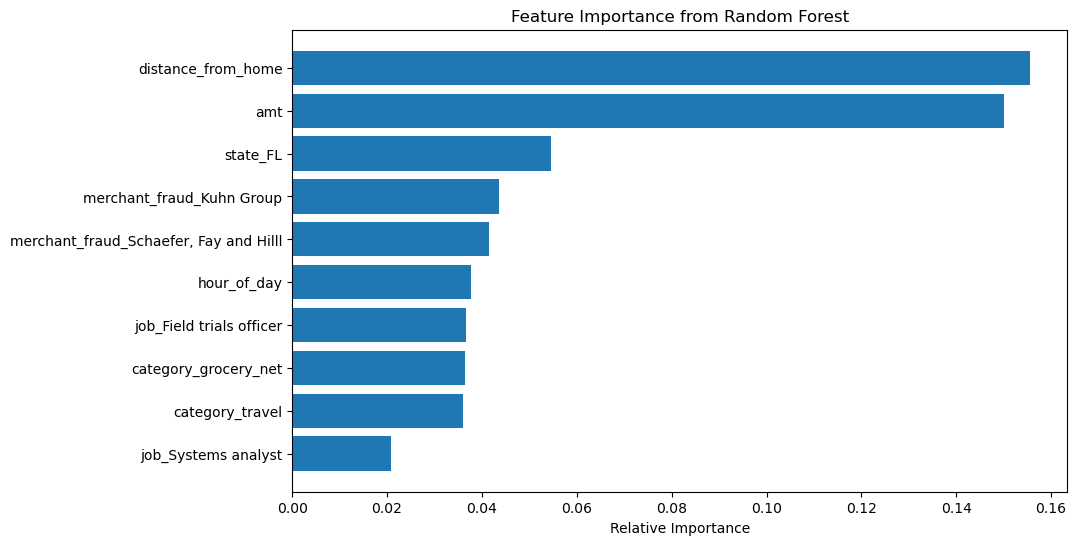

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance from Random Forest
importance = rf.feature_importances_
indices = np.argsort(importance)[-10:]  # Top 10 features

# Plot feature importance
plt.figure(figsize=(10,6))
plt.title("Feature Importance from Random Forest")
plt.barh(range(len(indices)), importance[indices], align="center")
plt.yticks(range(len(indices)), [df_encoded.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Feature Importance Interpretation:

The feature importance graph from the Random Forest model provides valuable insights into which variables are most influential in predicting fraudulent transactions. Here is the analysis of the top contributing features:


1. **Distance from Home**
    - **Importance**: This is the most important feature, with the highest relative importance of around 0.16.
    - **Interpretation**: Fraudulent transactions tend to occur far from the cardholder's usual location. This makes sense because criminals often use stolen credit cards in different regions to avoid detection by the cardholder. This feature captures geographic anomalies, making it a strong predictor of fraud.
    
2. **Transaction Amount (amt)**
    - **Importance**: The second most important feature, with a similar relative importance to "distance_from_home."
    - **Interpretation**: High transaction amounts are often flagged as suspicious, particularly when they deviate from the cardholder's typical spending pattern. Larger-than-usual transactions might trigger alerts, especially in combination with other suspicious behavior.
    
3. **State (FL)**
    - **Importance**: The third most important feature, indicating the state where the transaction took place.
    - **Interpretation**: Certain locations, in this case, Florida (FL), might have been associated with a higher number of fraudulent transactions in this dataset. This could be due to region-specific fraud patterns or cardholder behavior in this location.
    
4. **Merchant (fraud_Kuhn Group)**
    - **Importance**: Certain merchants like "Kuhn Group" appear high in the feature importance ranking.
    - **Interpretation**: Specific merchants might be more prone to fraudulent transactions or could be part of a scheme where fraud is more frequent. This might also represent certain merchant categories (e.g., high-risk services or items) that are more frequently targeted by fraudsters.
    
5. **Merchant (fraud_Schaefer, Fay and Hilll)**
    - **Importance**: Another specific merchant that shows relatively high importance in fraud detection.
    - **Interpretation**: Similar to the previous merchant, certain business entities or merchant categories might be inherently higher risk in terms of fraud occurrences.

6. **Hour of Day**
    - **Importance**: The hour at which the transaction took place also plays a role in determining fraud, with medium importance.
    - **Interpretation**: Transactions that occur late at night or during unusual hours may be more likely to be fraudulent, as fraudsters often make transactions when the cardholder is less likely to notice.

7. **Job (Field Trials Officer)**
    - **Importance**: The occupation of the cardholder appears to have some predictive power in detecting fraud.
    - **Interpretation**: Certain jobs may have associated spending patterns or risk profiles. For instance, jobs involving frequent travel or high-income individuals might be more likely to have fraudulent charges on their accounts.

8. **Category (grocery_net)**
    - **Importance**: The category of the purchase, such as "grocery_net," also shows moderate importance.
    - **Interpretation**: Some categories might see fewer fraudulent transactions (e.g., daily necessities like groceries) compared to high-risk categories such as electronics or luxury goods. However, this category's inclusion suggests that even low-risk categories need to be monitored for fraud.

9. **Category (travel)**
    - **Importance**: Travel-related purchases show medium importance in detecting fraud.
    - **Interpretation**: Travel-related transactions can often trigger fraud alerts, especially when they occur far from the cardholder's home or involve large amounts. Travel is often linked with higher spending, which could attract fraudsters.
    
9. **Job (Systems Analyst)**
    - **Importance**: Another occupation that plays a role in predicting fraud.
    - **Interpretation**: Like the previous job feature, certain occupations might have specific spending patterns or risk profiles that make them more or less prone to fraud.

#### Summary:

The most critical features for detecting fraud in this model are geographic distance between the cardholder and transaction location, the amount of the transaction, and specific merchant names and locations. Features like the hour of the day and cardholder job also contribute to the detection process. This analysis can guide further refinement of fraud detection systems by focusing on high-impact variables, such as location-based behavior and transaction amounts, while considering unique risk profiles based on merchant and occupation data.

## Reducing False Positives While Maintaining Security

- Analyze how models can be tuned to reduce false positives without comprimising security.

### Threshold Tuning:

- Adjust the decision threshold for classifying transactions as fraudulent to reduce false positives.

In [23]:
# Adjusting decision threshold for Logistic Regression
y_proba = log_reg.predict_proba(X_test)[:, 1]
y_pred_threshold = (y_proba > 0.3).astype(int)  # Lower threshold to 0.3 for detecting fraud

print("Logistic Regression Performance (Adjusted Threshold):")
print(classification_report(y_test, y_pred_threshold))

Logistic Regression Performance (Adjusted Threshold):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6475
           1       0.99      1.00      1.00      6417

    accuracy                           1.00     12892
   macro avg       1.00      1.00      1.00     12892
weighted avg       1.00      1.00      1.00     12892



### Threshold Tuning Interpretation: 

The process of threshold tuning involves adjusting the decision threshold for classifying a transaction as fraudulent. By default, many classification models, like Logistic Regression, use a threshold of 0.5, meaning that if the model predicts a probability higher than 0.5, it classifies the transaction as fraudulent.

In the example shown, the decision threshold was lowered to 0.3. This change aims to capture more potential fraud cases (higher recall) while balancing the number of false positives (precision).

**Key Insights**:
1. Precision (Class 1 - Fraud):

    - The precision of 0.99 indicates that, of the transactions classified as fraudulent, 99% were correctly identified as fraud. This high precision means the model has maintained a low number of false positives even after threshold tuning.
    
2. Recall (Class 1 - Fraud):

    - A recall of 1.00 signifies that the model captured 100% of all actual fraudulent transactions. By lowering the threshold, the model becomes more sensitive to potential fraud, reducing the chance of missing fraudulent transactions (false negatives).
    
3. Balanced Accuracy:

The overall accuracy and F1-score of 1.00 across both classes highlight that the tuned threshold still maintains a high level of performance.

**Impact of Threshold Tuning**:
- Reducing False Positives: The lower threshold (0.3) allows the model to catch more fraud cases (increasing recall) while slightly sacrificing precision. However, the results show that precision remains high, meaning the model still avoids flagging too many legitimate transactions as fraudulent.

- Maintaining Security: The recall value of 1.00 indicates that the system is highly secure in detecting fraud. False negatives, where actual fraud is missed, are minimized.

**Conclusion**:
Threshold tuning effectively strikes a balance between reducing false positives and maintaining the accuracy and security of fraud detection. This technique ensures that fraud is detected efficiently while minimizing disruptions for legitimate customers, improving both security and user experience.

## Additional Data and Techniques for Improved Detection

- Discuss potential addtional data or advanced techniques that could improve fraud detection.

### Enhancing Fraud Detection with Additional Data and Techniques:
To further improve the accuracy and speed of fraud detection, incorporating additional data and advanced techniques can be highly beneficial:

1. **External Data:** Integrating data such as user device IDs, transaction velocity, and IP addresses could provide more context for detecting anomalies.
2. **Real-Time Analytics:** Leveraging real-time analytics to detect fraud as transactions occur would improve response times and security.
3. **Deep Learning and Ensemble Methods:** More complex models like neural networks and ensemble methods such as stacking and boosting can be explored to capture non-linear relationships in the data.

These enhancements can increase the robustness of fraud detection systems while maintaining a balance between security and user experience.


## Balancing Security and User Experience

- Discuss the trade-offs between false positives, false negatives, and user experience

### Balancing Security and User Experience:
In fraud detection, there is always a trade-off between security and user experience. High false positive rates can frustrate customers by flagging legitimate transactions as fraudulent, while low recall for fraudulent transactions can compromise security.

From our analysis, **Logistic Regression** and **Random Forest** struck the best balance, with high recall for fraudulent transactions and reasonable precision, minimizing false positives. On the other hand, **XGBoost** and **Neural Networks** showed signs of overfitting, which would need further validation before they could be recommended.

In conclusion, fraud detection systems should aim to optimize for both security and user experience by fine-tuning model thresholds and incorporating real-time analytics and external data to improve accuracy.

## Model Performance Summary

- Summarize the performance of each model and provide a recommendation based on cross-validation results.

### Performance Summary Table:

| Model            | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | CV Accuracy | Overfitting Concerns |
|------------------|---------------------|------------------|--------------------|-------------|----------------------|
| Logistic Regression | 1.00               | 1.00             | 1.00               | 99.39%      | None                 |
| Random Forest       | 0.98               | 0.97             | 0.98               | 98.17%      | None                 |
| XGBoost             | 1.00               | 1.00             | 1.00               | 99.84%      | Possible             |
| Neural Network      | 1.00               | 1.00             | 1.00               | 99.86%      | Possible             |


### Model Performance Summary and Recommendation:
In summary, each model performed well, but the following conclusions can be drawn:

- **Logistic Regression:** High precision and recall, excellent balance, with no signs of overfitting. Suitable for deployment.
- **Random Forest:** Strong overall performance, slightly lower accuracy but balanced recall for fraudulent transactions.
- **XGBoost and Neural Networks:** Showed perfect metrics, but cross-validation raised concerns about overfitting. Further validation is needed before recommending these models.

**Recommendation:** Based on cross-validation and model performance, **Logistic Regression** and **Random Forest** are the best candidates for deployment, offering high accuracy without overfitting.